In [ ]:
# Insights extracted from the DataSet:

# Observed Male-Female Ratio in each department at IBM using bargraph.
# Observed Age distribution of employees at IBM.
# Promoted Sales Executives in the company based on years at Company, their performance rating etc.
# Provided extra Travel Allowance to the employees who live more than 5 KM away from the office, depending on their actual distance.
# Calculated the Cost to IBM per working-day to provide this travel allowance to Employees.
# Due to surge in Covid-19 cases HR Manager decided to transfer some Sales staff (who have a Medical Degree) to Medical Representative Role.
# Calculated the Correlation between Total Years of Experience and Salary of the Employees, along with Scatter Plot depicting the same.
# Calculated the average salary for each JobRole at IBM.
# Calculated the percentage of employees who left IBM (Attrition Count) in each JobRole, further ploting the data on a bar graph.  

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series 

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style('whitegrid') 

In [66]:
# Importing the IBM_HR DataSet:

IBM_HR = pd.read_csv(r'C:\Users\Ayush Jain\IBM HR DataSet.csv')  

In [4]:
IBM_HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# to display all the columns of the dataset:

pd.set_option('display.max_columns',None) 
IBM_HR.head() 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


C:\Users\Ayush Jain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


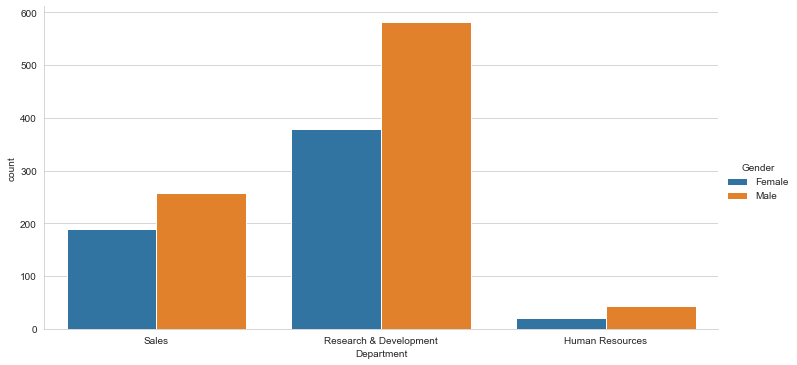

In [6]:
# Checking Male-Female Balance in various departments of the comapny:

sns.catplot('Department',
            data=IBM_HR,
            kind='count',
            hue='Gender',
            aspect=2) 

In [7]:
# Looks like distribution of Men and Women in each department in even. 
# Women are approximately 70% of Men in each department.

<AxesSubplot:xlabel='Age', ylabel='Count'>

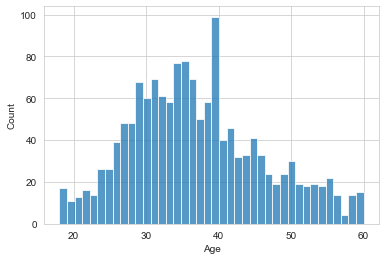

In [8]:
# Age distribution at IBM:

sns.histplot(x='Age',
             data=IBM_HR,
             stat='count',
             bins=40) 

In [9]:
# looks like majority of people at IBM are between 28 and 40 years of age.

In [10]:
# HR Manager decided to give promotion to Sales Executives:
 # Conditions to be eligible:
    #YearsAtCompany should be more than 4.
    #Performance Rating should be 4.
    #Years since last promotion should be more than or equal to 3.  

In [11]:
# Function for defining Eligibility for promotion:

def Eligibilty(Elg):
    JR,YaC,PR,YsP = Elg 
    if JR=='Sales Executive' and YaC>4 and PR==4 and YsP>=3:
        return 'Yes'
    else:
        return 'No'

In [12]:
# Adding a new column that will determine eligiblity for promotion:

IBM_HR['EligibleForPromotion'] = IBM_HR[['JobRole','YearsAtCompany','PerformanceRating','YearsSinceLastPromotion']].apply(Eligibilty,axis=1)  

In [13]:
# Here's the list of Sales Executives that are going to be Promoted:

IBM_HR[IBM_HR['EligibleForPromotion']=='Yes']  

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EligibleForPromotion
46,34,No,Non-Travel,1065,Sales,23,4,Marketing,1,60,2,Male,72,3,2,Sales Executive,3,Single,4568,10034,0,Y,No,20,4,3,80,0,10,2,3,9,5,8,7,Yes
178,46,No,Travel_Rarely,526,Sales,1,2,Marketing,1,244,2,Female,92,3,3,Sales Executive,1,Divorced,10453,2137,1,Y,No,25,4,3,80,3,24,2,3,24,13,15,7,Yes
277,38,No,Travel_Rarely,322,Sales,7,2,Medical,1,382,1,Female,44,4,2,Sales Executive,1,Divorced,5605,19191,1,Y,Yes,24,4,3,80,1,8,3,3,8,0,7,7,Yes
281,42,No,Travel_Rarely,635,Sales,1,1,Life Sciences,1,387,2,Male,99,3,2,Sales Executive,3,Married,4907,24532,1,Y,No,25,4,3,80,0,20,3,3,20,16,11,6,Yes
484,31,No,Travel_Rarely,525,Sales,6,4,Medical,1,653,1,Male,66,4,2,Sales Executive,4,Divorced,5460,6219,4,Y,No,22,4,4,80,2,13,4,4,7,7,5,7,Yes
502,53,No,Travel_Rarely,238,Sales,1,1,Medical,1,682,4,Female,34,3,2,Sales Executive,1,Single,8381,7507,7,Y,No,20,4,4,80,0,18,2,4,14,7,8,10,Yes
545,30,No,Travel_Rarely,501,Sales,27,5,Marketing,1,747,3,Male,99,3,2,Sales Executive,4,Divorced,5304,25275,7,Y,No,23,4,4,80,1,10,2,2,8,7,7,7,Yes
612,28,No,Travel_Rarely,760,Sales,2,4,Marketing,1,846,2,Female,81,3,2,Sales Executive,2,Married,4779,3698,1,Y,Yes,20,4,1,80,0,8,2,3,8,7,7,5,Yes
651,47,No,Travel_Rarely,249,Sales,2,2,Marketing,1,903,3,Female,35,3,2,Sales Executive,4,Married,4537,17783,0,Y,Yes,22,4,1,80,1,8,2,3,7,6,7,7,Yes
791,35,Yes,Travel_Rarely,1204,Sales,4,3,Technical Degree,1,1100,4,Male,86,3,3,Sales Executive,1,Single,9582,10333,0,Y,Yes,22,4,1,80,0,9,2,3,8,7,4,7,Yes


In [14]:
# HR Manager decided to give travel allowance to the Employees that live 5 KMs from the office due to the increasing petrol prices. 
    # Travel Allowances are diffrentiated depending on the distance from office:
    # 5-10  KMs >> 62.5  per/working_day
    # 10-20 KMs >> 125.0 per/working_day
    # 20-30 KMs >> 187.5 per/working_day
    # 30-40 KMs >> 250.0 per/working_day
    # 40 KMs or more >> 300.0 per/working_day  

In [15]:
# Filtering out Employees eligible for Travel Allowance and eliminating unnecessary columns:

IBM_HR_TA = IBM_HR[IBM_HR['DistanceFromHome']>=5] 
IBM_HR_TA = IBM_HR_TA[['DistanceFromHome','EmployeeNumber','Department','BusinessTravel']]  

In [16]:
def Travel_all(D):
    if D>=5 and D<=10:
        return 62.5
    elif D>10 and D<=20:
        return 125.0
    elif D>20 and D<=30:
        return 187.5
    elif D>30 and D<=40:
        return 250.0
    else:
        return 300.0

In [17]:
# Employees list according to the Travel Allowance they are eligible for:

IBM_HR_TA['TravelAllowancePerDay'] = IBM_HR_TA['DistanceFromHome'].apply(Travel_all) 
IBM_HR_TA 

,DistanceFromHome,EmployeeNumber,Department,BusinessTravel,TravelAllowancePerDay
1,8,2,Research & Development,Travel_Frequently,62.5
7,24,11,Research & Development,Travel_Rarely,187.5
8,23,12,Research & Development,Travel_Frequently,187.5
9,27,13,Research & Development,Travel_Rarely,187.5
10,16,14,Research & Development,Travel_Rarely,125.0
...,...,...,...,...,...
1463,5,2057,Research & Development,Non-Travel,62.5
1464,5,2060,Sales,Travel_Rarely,62.5
1465,23,2061,Research & Development,Travel_Frequently,187.5
1466,6,2062,Research & Development,Travel_Rarely,62.5


In [18]:
# Making bins for diffrent KMs ranges to check how many no. of employees that fall in them:

Ranges=[5,10,20,30,40]
Distances= IBM_HR_TA['DistanceFromHome']

Distance_cat = pd.cut(Distances,Ranges) 
Distance_cat = Distance_cat.value_counts()
print(Distance_cat)


(5, 10]     394
(10, 20]    240
(20, 30]    204
(30, 40]      0
Name: DistanceFromHome, dtype: int64


<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

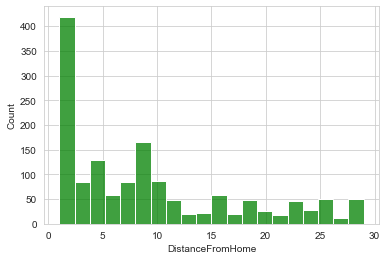

In [19]:
# Graphically representing the Distance from home of the employees:

sns.histplot(x='DistanceFromHome',
             data=IBM_HR,
             stat='count',
             bins=20, 
             color='Green') 

In [20]:
# How much will the Travel Allowance policy will cost to the company:

IBM_HR_TA['TravelAllowancePerDay'].sum() 

# Its going to cost Rs.96937.5/- per Working day to the company.

96937.5

In [21]:
# Due to surge in Covid-19 cases HR Manager decided to transfer some Sales staff to Medical Representative Role.
    # Conditionally they should be having a Medical Degree in their Educational Field.

IBM_HR_2 = IBM_HR.copy()

#Identifying such employees:
ind=[]
for i,EF,Dept in zip(IBM_HR_2.index,IBM_HR_2['EducationField'],IBM_HR_2['Department']): 
    if Dept=='Sales' and EF =='Medical': 
        ind.append(i)

# Changing their JobRole to 'Medical Representative':
IBM_HR_2['JobRole'].iloc[ind]='Medical Representative'
IBM_HR_2['Department'].iloc[ind]='Research & Development'

C:\Users\Ayush Jain\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Correlation Coefficient is 0.773


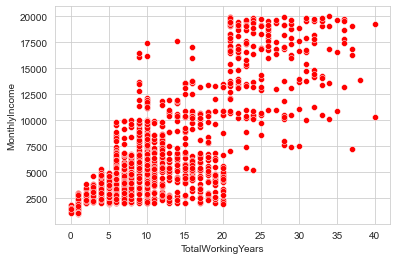

In [63]:
# HR Manager wants to know the Correlation between Total Years of Experience and Salary of the Employees.

sns.scatterplot(x='TotalWorkingYears',
                y='MonthlyIncome',
                data=IBM_HR_2,
                color='red') 

# Correlation Coefficient:
Coeff = IBM_HR_2['TotalWorkingYears'].corr(IBM_HR_2['MonthlyIncome'])
print('Correlation Coefficient is',round(Coeff,3)) 

In [23]:
# Total Working Years and Salary of Employees have a good positive correlation,which means that they are directly propotional.
# By graphical observation it seems that data has some amount of outliers aswell.

In [24]:
IBM_HR.head() 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EligibleForPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,No
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,No
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [25]:
# HR manager wants to know average salary for each Job Role at IBM. 

AvgSalary = IBM_HR_2['MonthlyIncome'].groupby(IBM_HR_2['JobRole']).mean()

AvgSalary.sort_values(ascending=False) 

JobRole
Manager                      17211.690722
Research Director            16033.550000
Healthcare Representative     7528.763359
Manufacturing Director        7295.137931
Sales Executive               6976.758621
Medical Representative        6377.227273
Human Resources               4235.750000
Research Scientist            3239.972603
Laboratory Technician         3237.169884
Sales Representative          2709.846154
Name: MonthlyIncome, dtype: float64

<AxesSubplot:xlabel='Attrition', ylabel='JobRole'>

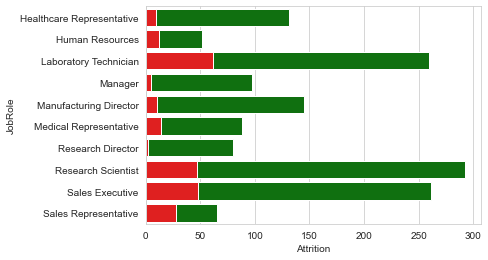

In [64]:
# HR Manager wants to the observe the Attrition in Each JobRole.

Attrition_count = IBM_HR_2['Attrition'][IBM_HR_2['Attrition']=='Yes'].groupby(IBM_HR_2['JobRole']).count().to_frame()
Total_Employee_count = IBM_HR_2['JobRole'].groupby(IBM_HR_2['JobRole']).count().to_frame()

# Merging both dataframes:

Employee_attrition_df = Total_Employee_count.merge(Attrition_count,left_index=True,right_index=True)

# Ploting the data on a bar graph:

sns.barplot(y=Employee_attrition_df.index,
            x='JobRole',
            data=Employee_attrition_df,
            color='Green') 

sns.barplot(y=Employee_attrition_df.index,
            x='Attrition',
            data=Employee_attrition_df,
            color='Red') 




In [73]:
# Net Employee Count & Percentage of employees quit in Each JobRole:

Employee_attrition_df['NetEmployeeCount'] = Employee_attrition_df['JobRole']-Employee_attrition_df['Attrition']
Employee_attrition_df['PercentageLeftIBM'] = Employee_attrition_df['Attrition']/Employee_attrition_df['JobRole']*100

Employee_attrition_df 

,JobRole,Attrition,NetEmployeeCount,PercentageLeftIBM
JobRole,,,,
Healthcare Representative,131,9,122,6.870229
Human Resources,52,12,40,23.076923
Laboratory Technician,259,62,197,23.938224
Manager,97,5,92,5.154639
Manufacturing Director,145,10,135,6.896552
Medical Representative,88,14,74,15.909091
Research Director,80,2,78,2.500000
Research Scientist,292,47,245,16.095890
Sales Executive,261,48,213,18.390805
